In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

## Data Loading
Load trading and user activity datasets from CSV files.

In [10]:
trades = pd.read_csv("../data/trades.csv")
activity = pd.read_csv("../data/user_activitycsv.csv")

In [6]:
trades.head()
trades.info()
activity.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pair       2324 non-null   object 
 1   amount     2324 non-null   float64
 2   volume     2324 non-null   float64
 3   side       2324 non-null   object 
 4   timestamp  2324 non-null   object 
 5   user_id    2324 non-null   object 
dtypes: float64(2), object(4)
memory usage: 109.1+ KB


,asset,amount,activity_type,timestamp,user_id
0,NGN,131062.0,withdrawal,2025-01-17T14:37:56.806446Z,561-1561-1521-1981-1101
1,NGN,50000.0,withdrawal,2025-01-17T14:37:56.818033Z,971-11001-1521-1571-1101
2,NGN,131062.0,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100
3,NGN,20064.0,withdrawal,2025-01-17T17:05:18.201218Z,531-11001-1521-1571-198
4,NGN,2000.0,withdrawal,2025-01-17T14:38:22.555744Z,501-11021-1521-1561-154


## Data Preprocessing: Timestamp Conversion

Convert timestamp columns to datetime format and extract time-based features for both datasets:

- **`timestamp`**: Convert to UTC-aware datetime objects
- **`date`**: Extract date component (YYYY-MM-DD)
- **`hour`**: Extract hour of day (0-23)
- **`day_name`**: Extract weekday name (Monday-Sunday)

These features will enable time-based analysis and aggregation.

In [17]:
# Process timestamps for trades data
trades['timestamp'] = pd.to_datetime(trades['timestamp'], utc=True)
trades['date'] = trades['timestamp'].dt.date
trades['hour'] = trades['timestamp'].dt.hour
trades['day_name'] = trades['timestamp'].dt.day_name()
# Process timestamps for user activity data
activity['timestamp'] = pd.to_datetime(activity['timestamp'], utc=True)
activity['date'] = activity['timestamp'].dt.date
activity['hour'] = activity['timestamp'].dt.hour
activity['day_name'] = activity['timestamp'].dt.day_name()

## Volume Analysis: Top Trading Pairs

Calculate USD trading volume for each cryptocurrency pair and identify the top 3 most active pairs:

**Calculation:**
- `usd_volume = (amount × volume) ÷ 1500` - Convert trade volume to USD equivalent
- `1500` is assumed to be an exchange rate

**Analysis Steps:**
1. Group trades by cryptocurrency pair
2. Sum USD volume for each pair across all trades
3. Sort pairs from highest to lowest total volume
4. Select top 3 performing pairs

**Purpose:** Identify which cryptocurrency pairs have the highest liquidity and trading activity.

In [22]:
trades['usd_volume'] = (trades['amount'] * trades['volume']) / 1500

top_pairs = (
    trades.groupby('pair')['usd_volume']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

top_pairs


pair
BTTNGN     4.132513e+09
PEPENGN    1.023854e+08
USDTNGN    4.691369e+07
Name: usd_volume, dtype: float64

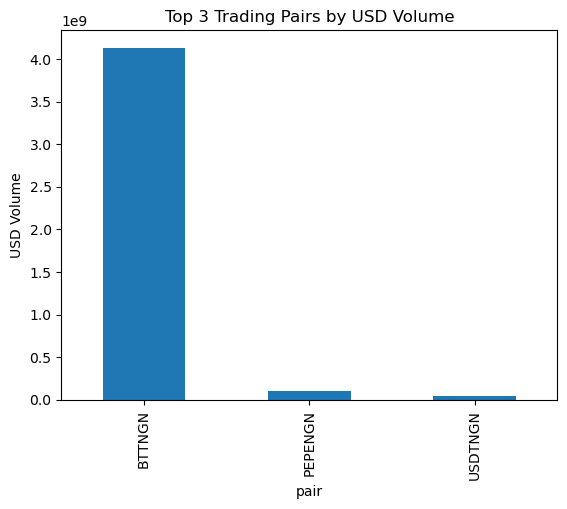

In [23]:
top_pairs.plot(kind='bar', title='Top 3 Trading Pairs by USD Volume')
plt.ylabel("USD Volume")
plt.show()
